 **Import libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

**Reading the data**

In [2]:
data=pd.read_csv('bank churn dataset.csv')

**Explore the data and get the number of rows & columns :**

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**To check the number of missing data for each column :**

In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Dropping irrelevant features**

In [7]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

**Descriptive statistics of the data set**

In [9]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:>

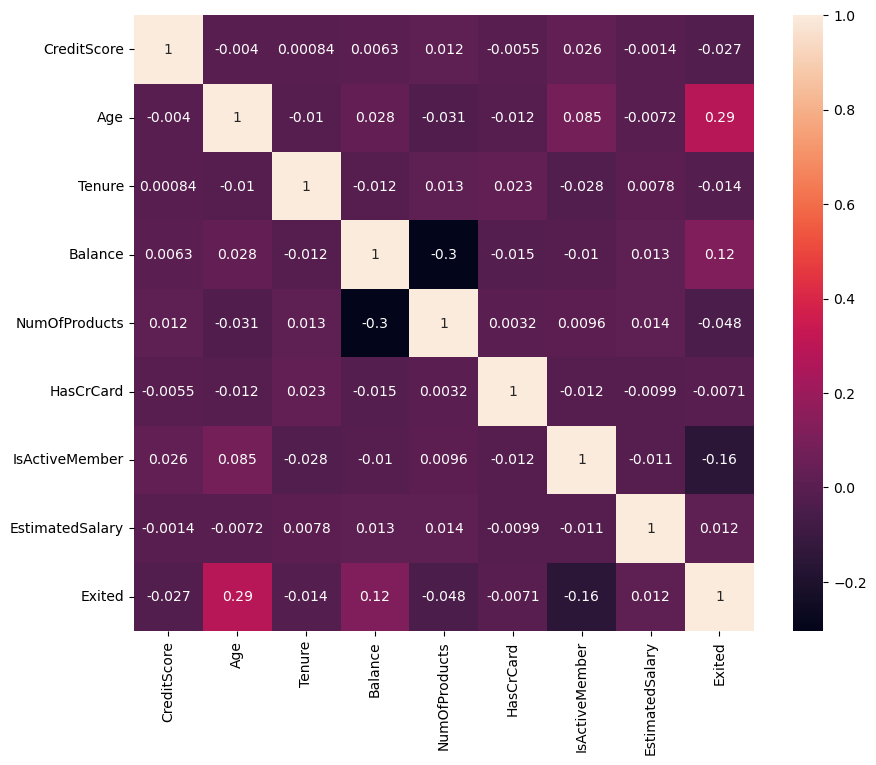

In [10]:
plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)

***Data Visualisation***

**Countplot of categorical variables(Gender, Geography, IsActiveMember, NumOfProducts) who get exited or not**

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

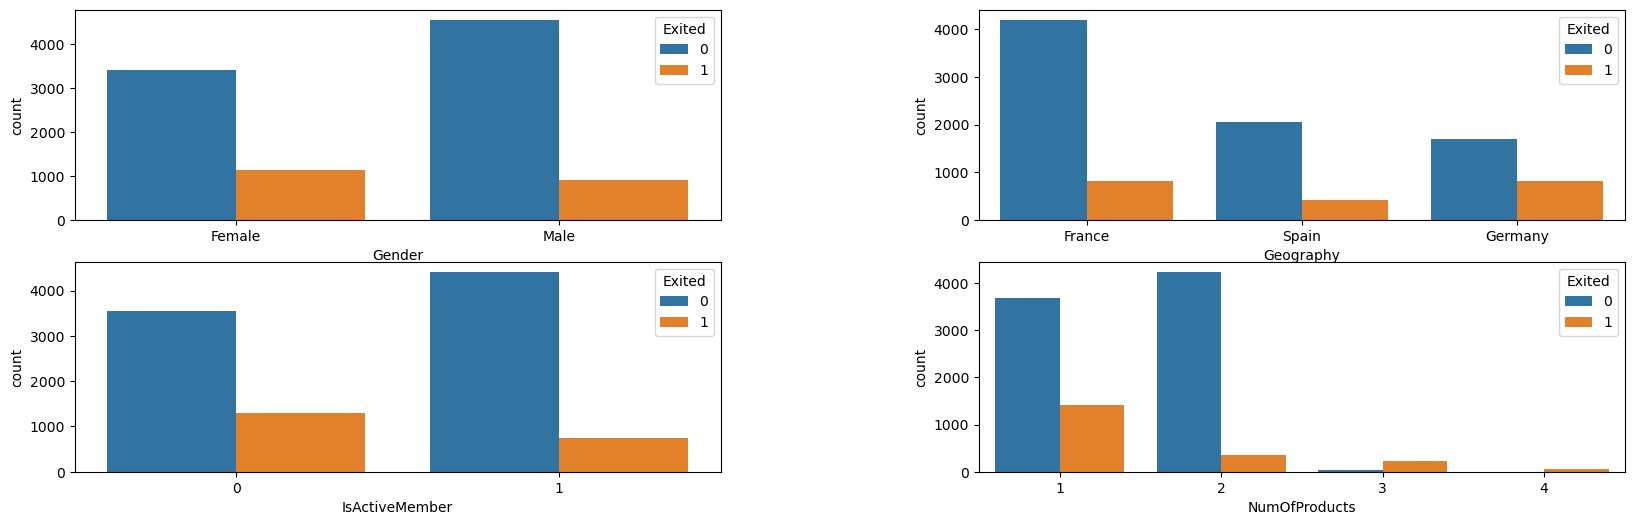

In [11]:
fig, ax = plt.subplots(2,2, figsize=(20, 6))

plt.subplots_adjust(wspace=0.4)

sns.countplot(x='Gender',hue='Exited', data=data, ax=ax[0][0])
sns.countplot(x='Geography', hue='Exited', data=data, ax=ax[0][1])
sns.countplot(x='IsActiveMember', hue='Exited', data=data, ax=ax[1][0])
sns.countplot(x='NumOfProducts', hue='Exited', data=data, ax=ax[1][1])


*Customers who have num of product 3 or 4 have higher chances get exited.* 

**Scatterplot of age against EstimatedSalary and credit score who get exited or not**

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

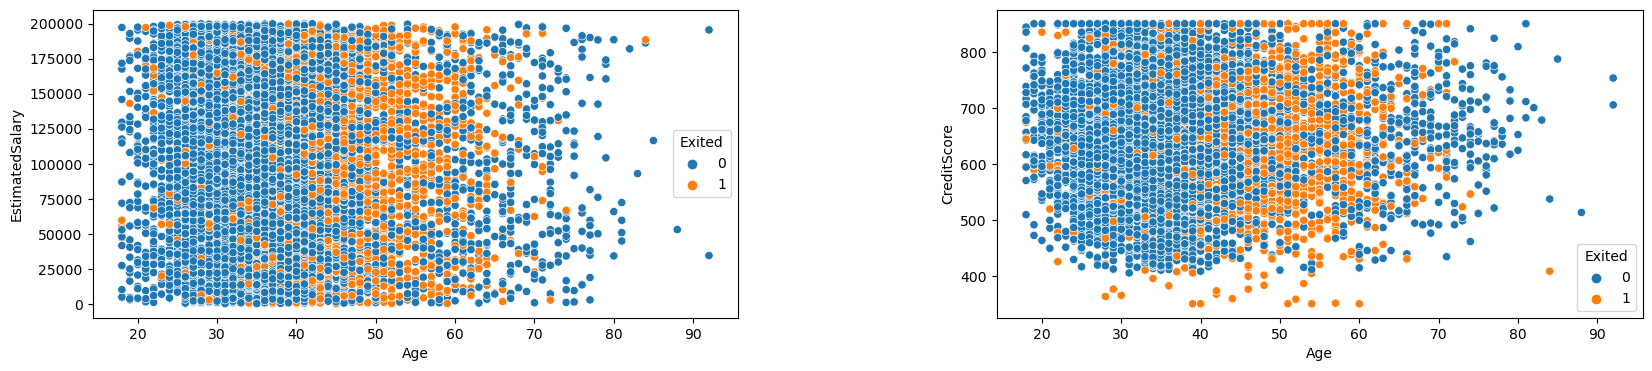

In [12]:
fig, ax = plt.subplots(1,2, figsize=(20, 4))

plt.subplots_adjust(wspace=0.4)

sns.scatterplot(x='Age', y='EstimatedSalary', hue='Exited', data=data, ax=ax[0])
sns.scatterplot(x='Age', y='CreditScore', hue='Exited', data=data, ax=ax[1])

 *Customers whose age between 45 to 65 have higher chances get exited.*

**creating dummy variables for the categorical features**


In [13]:
encoder = LabelEncoder()
data["Geography"] = encoder.fit_transform(data["Geography"])
data["Gender"] = encoder.fit_transform(data["Gender"])

In [14]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


**Prediction with ML models**

**Splitting the Dataset into Dependent and Independent Variables**

In [15]:
x = data.drop("Exited", axis=1)
y = data["Exited"]

**Splitting the dataset into Training and Testing Data**

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 42)

**Training and Evaluation of Machine Learning Models**

We divide data into training and test set. Now we use the three most commomnly used machine learning algorithms:Random forest,
support vector machines, logistic regression.

**Random Forest Classifier**

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=7)
rfc.fit(x_train,y_train)
rfcpred=rfc.predict(x_test)

from sklearn.metrics import accuracy_score
print("Random_Forest :", accuracy_score(y_test,rfcpred)*100)

Random_Forest : 86.95


**support vector machines**

In [18]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
svmpred=svm.predict(x_test)

print("Support_Vector :", accuracy_score(y_test,svmpred)*100)

Support_Vector : 80.35


**Logistic Regression**

In [19]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression() 
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

print("Logistic :", accuracy_score(y_test,pred)*100)

Logistic : 80.05


**Conclusion: Random Forest Classifier is best fitted which gives accuracy score  86.95%.**